In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

### hero data
https://api.opendota.com/api/players/116926281/heroes <br>
curl -o 116926281_hero.json https://api.opendota.com/api/players/116926281/heroes

In [2]:
hero_stats=pd.read_json('./116926281_hero.json',orient='columns')
hero_stats

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win
0,95,1566812629,101,60,136,73,142,77
1,21,1578854947,97,44,229,105,302,157
2,56,1544967943,80,30,145,61,144,77
3,64,1556947828,77,38,79,42,121,61
4,86,1580932376,74,36,167,66,221,117
...,...,...,...,...,...,...,...,...
114,119,1541502627,2,2,13,6,13,6
115,129,1563680213,1,1,6,1,14,8
116,121,0,0,0,11,5,14,9
117,126,0,0,0,1,1,1,1


In [3]:
hero_names=pd.read_json('./hero_names.json',orient='columns')
hero_names.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2


In [4]:
hero_stats=pd.merge(hero_stats,hero_names,left_on='hero_id',right_on='id',how='inner',indicator=True)

In [5]:
hero_stats.head()

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win,id,name,localized_name,primary_attr,attack_type,roles,legs,_merge
0,95,1566812629,101,60,136,73,142,77,95,npc_dota_hero_troll_warlord,Troll Warlord,agi,Ranged,"[Carry, Pusher, Disabler, Durable]",2,both
1,21,1578854947,97,44,229,105,302,157,21,npc_dota_hero_windrunner,Windranger,int,Ranged,"[Carry, Support, Disabler, Escape, Nuker]",2,both
2,56,1544967943,80,30,145,61,144,77,56,npc_dota_hero_clinkz,Clinkz,agi,Ranged,"[Carry, Escape, Pusher]",2,both
3,64,1556947828,77,38,79,42,121,61,64,npc_dota_hero_jakiro,Jakiro,int,Ranged,"[Support, Nuker, Pusher, Disabler]",2,both
4,86,1580932376,74,36,167,66,221,117,86,npc_dota_hero_rubick,Rubick,int,Ranged,"[Support, Disabler, Nuker]",2,both


### Roles

In [6]:
hero_stats['roles'][0]

['Carry', 'Pusher', 'Disabler', 'Durable']

In [7]:
hero_stats_roles=pd.DataFrame(hero_stats['roles'].values.tolist(), columns=['1_role','2_role','3_role','4_role','5_role','6_role'])

In [8]:
hero_stats_roles

,1_role,2_role,3_role,4_role,5_role,6_role
0,Carry,Pusher,Disabler,Durable,None,None
1,Carry,Support,Disabler,Escape,Nuker,None
2,Carry,Escape,Pusher,None,None,None
3,Support,Nuker,Pusher,Disabler,None,None
4,Support,Disabler,Nuker,None,None,None
...,...,...,...,...,...,...
114,Support,Nuker,Disabler,Escape,None,None
115,Carry,Initiator,Disabler,Durable,None,None
116,Support,Nuker,Disabler,Escape,None,None
117,Carry,Escape,Nuker,Disabler,None,None


In [9]:
hero_stats_roles['1_role'].value_counts(dropna=False)

Carry        63
Support      35
Initiator    11
Nuker         5
Disabler      3
Escape        1
Durable       1
Name: 1_role, dtype: int64

In [10]:
hero_stats_roles['2_role'].value_counts(dropna=False)

Nuker        28
Disabler     23
Escape       17
Durable      12
Initiator    11
Pusher       10
Support       8
Jungler       7
Carry         2
NaN           1
Name: 2_role, dtype: int64

In [11]:
hero_stats_roles['3_role'].value_counts(dropna=False)

Disabler     34
Nuker        23
Durable      16
Initiator    12
Pusher       11
NaN          10
Escape        8
Jungler       4
Support       1
Name: 3_role, dtype: int64

In [12]:
hero_stats[hero_stats_roles['3_role'].isnull()]

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win,id,name,localized_name,primary_attr,attack_type,roles,legs,_merge
16,31,1565914236,55,41,99,54,99,35,31,npc_dota_hero_lich,Lich,int,Ranged,"[Support, Nuker]",2,both
18,46,1564229892,53,17,130,68,147,78,46,npc_dota_hero_templar_assassin,Templar Assassin,agi,Ranged,"[Carry, Escape]",2,both
27,44,1581016691,40,22,409,211,507,274,44,npc_dota_hero_phantom_assassin,Phantom Assassin,agi,Melee,"[Carry, Escape]",2,both
32,62,1565906878,39,22,212,99,248,120,62,npc_dota_hero_bounty_hunter,Bounty Hunter,agi,Melee,"[Escape, Nuker]",2,both
35,11,1566479966,38,16,267,140,291,139,11,npc_dota_hero_nevermore,Shadow Fiend,agi,Ranged,"[Carry, Nuker]",0,both
52,63,1576166135,32,17,198,100,179,99,63,npc_dota_hero_weaver,Weaver,agi,Ranged,"[Carry, Escape]",4,both
53,45,1565911702,31,12,87,35,95,52,45,npc_dota_hero_pugna,Pugna,int,Ranged,"[Nuker, Pusher]",2,both
56,22,1552935353,31,19,181,108,235,92,22,npc_dota_hero_zuus,Zeus,int,Ranged,[Nuker],2,both
83,35,1566900964,23,8,476,253,608,283,35,npc_dota_hero_sniper,Sniper,agi,Ranged,"[Carry, Nuker]",2,both
100,105,1546042290,14,6,77,44,85,42,105,npc_dota_hero_techies,Techies,int,Ranged,"[Nuker, Disabler]",6,both


In [13]:
hero_stats=pd.concat([hero_stats,hero_stats_roles],axis=1)
hero_stats.head()

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win,id,name,...,attack_type,roles,legs,_merge,1_role,2_role,3_role,4_role,5_role,6_role
0,95,1566812629,101,60,136,73,142,77,95,npc_dota_hero_troll_warlord,...,Ranged,"[Carry, Pusher, Disabler, Durable]",2,both,Carry,Pusher,Disabler,Durable,None,None
1,21,1578854947,97,44,229,105,302,157,21,npc_dota_hero_windrunner,...,Ranged,"[Carry, Support, Disabler, Escape, Nuker]",2,both,Carry,Support,Disabler,Escape,Nuker,None
2,56,1544967943,80,30,145,61,144,77,56,npc_dota_hero_clinkz,...,Ranged,"[Carry, Escape, Pusher]",2,both,Carry,Escape,Pusher,None,None,None
3,64,1556947828,77,38,79,42,121,61,64,npc_dota_hero_jakiro,...,Ranged,"[Support, Nuker, Pusher, Disabler]",2,both,Support,Nuker,Pusher,Disabler,None,None
4,86,1580932376,74,36,167,66,221,117,86,npc_dota_hero_rubick,...,Ranged,"[Support, Disabler, Nuker]",2,both,Support,Disabler,Nuker,None,None,None


In [14]:
hero_stats.columns

Index(['hero_id', 'last_played', 'games', 'win', 'with_games', 'with_win',
       'against_games', 'against_win', 'id', 'name', 'localized_name',
       'primary_attr', 'attack_type', 'roles', 'legs', '_merge', '1_role',
       '2_role', '3_role', '4_role', '5_role', '6_role'],
      dtype='object')

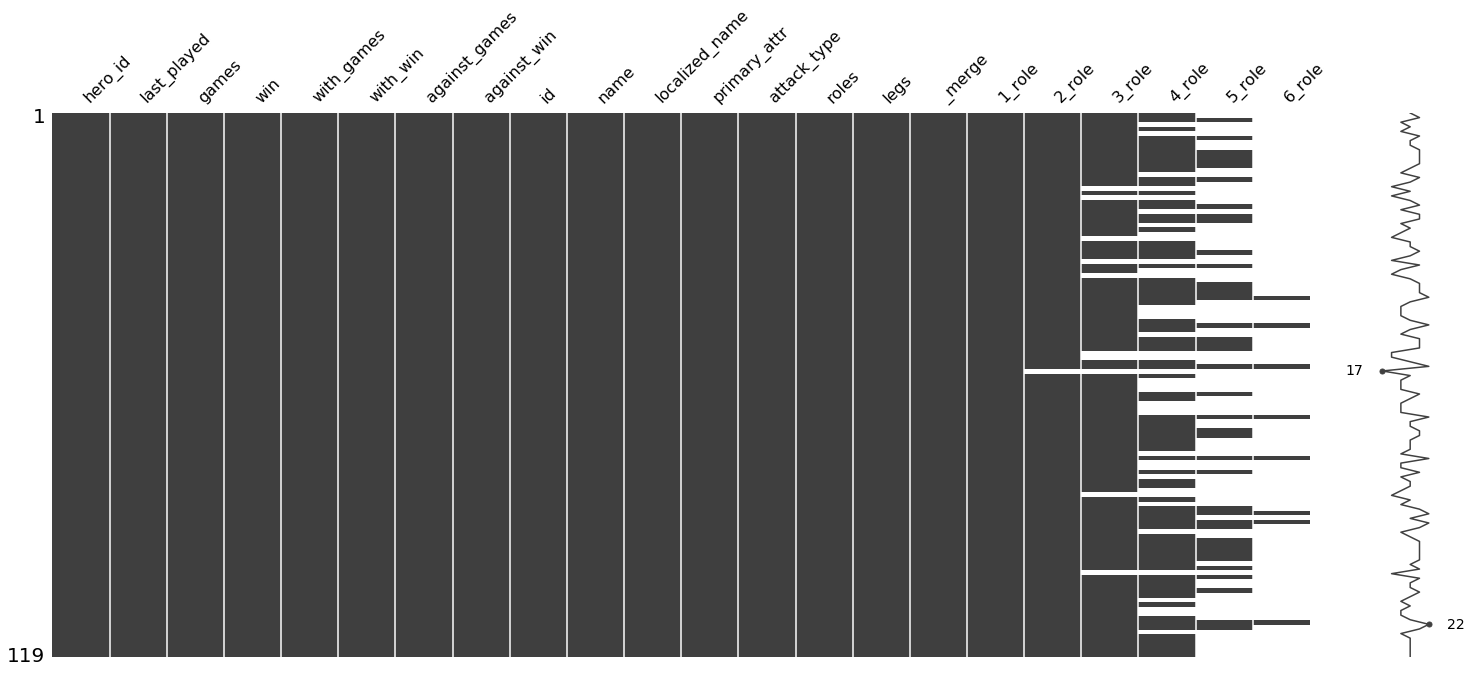

In [15]:
import missingno
missingno.matrix(hero_stats)

In [16]:
hero_model=hero_stats.drop(['hero_id','last_played','id','name','localized_name','roles','legs','_merge','4_role','5_role','6_role'],axis=1)

In [17]:
hero_model.head()

,games,win,with_games,with_win,against_games,against_win,primary_attr,attack_type,1_role,2_role,3_role
0,101,60,136,73,142,77,agi,Ranged,Carry,Pusher,Disabler
1,97,44,229,105,302,157,int,Ranged,Carry,Support,Disabler
2,80,30,145,61,144,77,agi,Ranged,Carry,Escape,Pusher
3,77,38,79,42,121,61,int,Ranged,Support,Nuker,Pusher
4,74,36,167,66,221,117,int,Ranged,Support,Disabler,Nuker


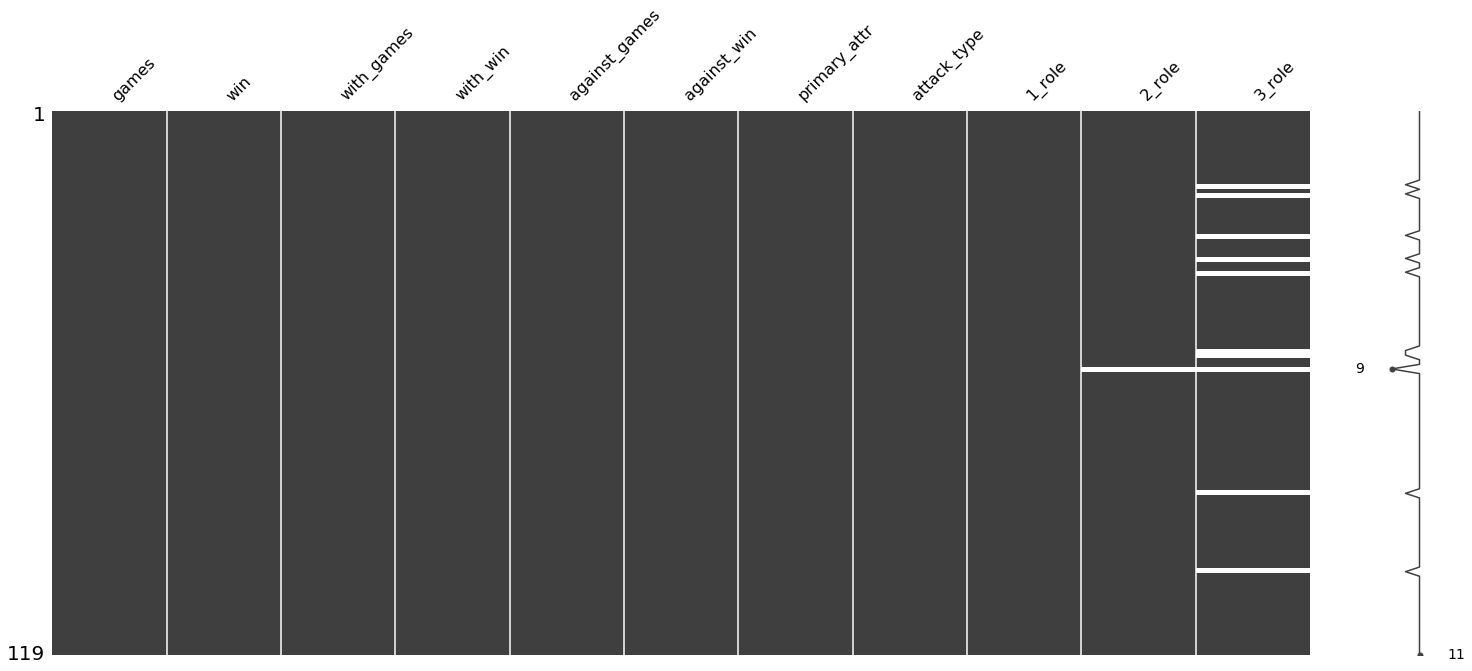

In [18]:
missingno.matrix(hero_model)

In [19]:
hero_model['2_role'].value_counts(dropna=False)

Nuker        28
Disabler     23
Escape       17
Durable      12
Initiator    11
Pusher       10
Support       8
Jungler       7
Carry         2
NaN           1
Name: 2_role, dtype: int64

In [20]:
hero_model['2_role']=hero_model['2_role'].fillna('None')
hero_model['3_role']=hero_model['3_role'].fillna('None')

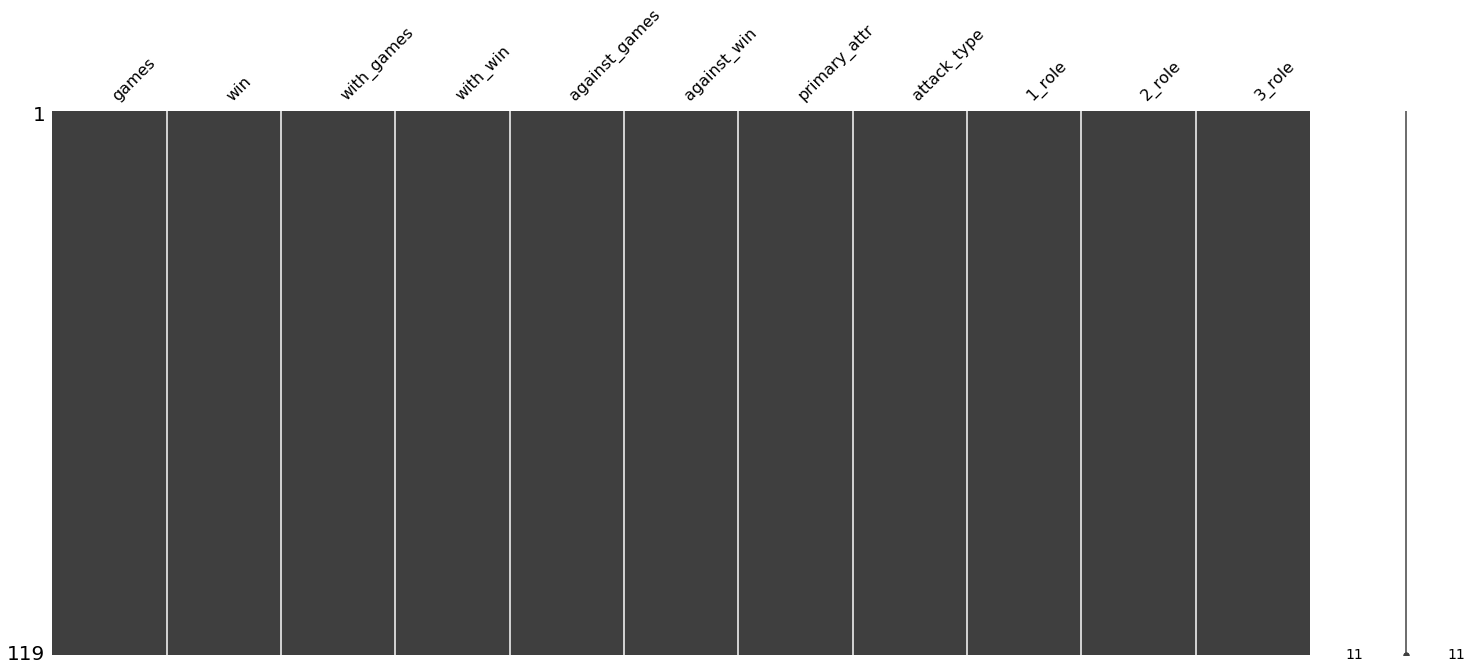

In [21]:
missingno.matrix(hero_model)

In [22]:
hero_model.head()

,games,win,with_games,with_win,against_games,against_win,primary_attr,attack_type,1_role,2_role,3_role
0,101,60,136,73,142,77,agi,Ranged,Carry,Pusher,Disabler
1,97,44,229,105,302,157,int,Ranged,Carry,Support,Disabler
2,80,30,145,61,144,77,agi,Ranged,Carry,Escape,Pusher
3,77,38,79,42,121,61,int,Ranged,Support,Nuker,Pusher
4,74,36,167,66,221,117,int,Ranged,Support,Disabler,Nuker


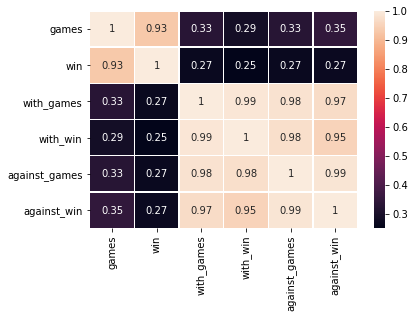

In [23]:
sns.heatmap(hero_model.corr(),annot=True,linewidths=0.3)

In [24]:
pd.options.display.max_columns = 999

In [25]:
hero_model=pd.get_dummies(hero_model, prefix=['primary_attr','attack_type','1_role','2_role','3_role'])
hero_model.head()

,games,win,with_games,with_win,against_games,against_win,primary_attr_agi,primary_attr_int,primary_attr_str,attack_type_Melee,attack_type_Ranged,1_role_Carry,1_role_Disabler,1_role_Durable,1_role_Escape,1_role_Initiator,1_role_Nuker,1_role_Support,2_role_Carry,2_role_Disabler,2_role_Durable,2_role_Escape,2_role_Initiator,2_role_Jungler,2_role_None,2_role_Nuker,2_role_Pusher,2_role_Support,3_role_Disabler,3_role_Durable,3_role_Escape,3_role_Initiator,3_role_Jungler,3_role_None,3_role_Nuker,3_role_Pusher,3_role_Support
0,101,60,136,73,142,77,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,97,44,229,105,302,157,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,80,30,145,61,144,77,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,77,38,79,42,121,61,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,74,36,167,66,221,117,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
X=hero_model

In [28]:
X_sca=sc.fit_transform(X)

## K-Means Cluster to find the Best Performing Heros

In [29]:
from sklearn.cluster import KMeans
kmeans=KMeans()

In [30]:
kmeans=KMeans(n_clusters=2).fit(X_sca)

In [31]:
centroids=kmeans.cluster_centers_

In [32]:
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0])

In [33]:
cluster_range=range(1,20)
cluster_errors=[]

for n_clusters in cluster_range:
    clusters=KMeans(n_clusters)
    clusters.fit(X_sca)
    cluster_errors.append(clusters.inertia_)

In [34]:
clusters_h=pd.DataFrame({'Num_clusters':cluster_range,'Cluster_Error':cluster_errors})
clusters_h.head(10)

,Num_clusters,Cluster_Error
0,1,4403.000000
1,2,3970.388167
2,3,3650.776106
3,4,3451.346143
4,5,3331.903378
5,6,3140.998524
6,7,3098.548011
7,8,2927.714509
8,9,2881.517640
9,10,2735.101649


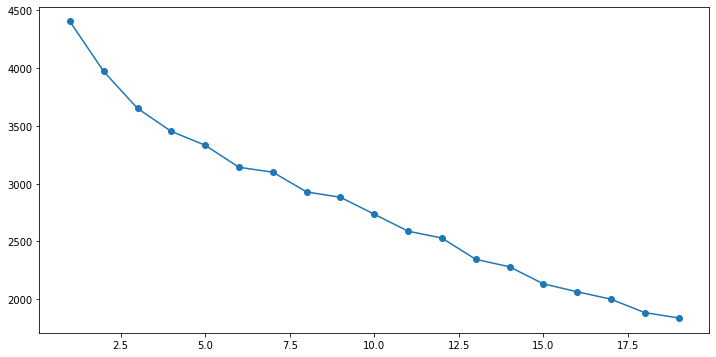

In [35]:
plt.figure(figsize=(12,6))
plt.plot(clusters_h.Num_clusters,clusters_h.Cluster_Error,marker='o')

In [36]:
kmeans=KMeans(n_clusters=5).fit(X_sca)
kmeans.cluster_centers_

array([[ 0.50461256,  0.68427285, -0.5979563 , -0.67630951, -0.59894545,
        -0.49449735, -0.67172875,  1.32945171, -0.698212  , -0.62520197,
         0.62520197, -0.72674864,  0.90236138, -0.09205746, -0.09205746,
         0.83170436, -0.20942695,  0.0860663 , -0.13074409, -0.48947251,
        -0.33488734, -0.40824829, -0.31914237,  4.        , -0.09205746,
        -0.5547002 , -0.30289127, -0.26846242, -0.26352314, -0.39413171,
         0.39710067,  0.21860702, -0.18650096, -0.30289127, -0.48947251,
         1.40712772, -0.09205746],
       [-0.52711555, -0.45219401, -0.18789913, -0.18911506, -0.15090848,
        -0.17355286, -0.61000232, -0.75218979,  1.37135998,  0.98574446,
        -0.98574446, -0.03030458,  0.02144225,  0.22093791, -0.09205746,
         0.47000967,  0.0753937 , -0.33197   ,  0.09152086,  0.23409555,
         0.51907538, -0.32659863,  0.27272166, -0.25      , -0.09205746,
        -0.35263084, -0.09692521,  0.07382717, -0.06324555,  0.44339818,
        -0.15436

In [37]:
y_kmeans=pd.DataFrame(kmeans.labels_)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sca,y_kmeans,test_size=0.25,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [40]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4),
    DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [41]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    #print("precision :",precision_score(y_test,y_pred),"\n")
    #print('Recall score:',recall_score(y_test,y_pred),'\n')
    #print("f1 score:",f1_score(y_test,y_pred),"\n")
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

[[ 2  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 11  0  0]
 [ 0  1  1  5  0]
 [ 0  0  0  0  2]]
accuracy train: 1.0 

accuracy test: 0.9333333333333333 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.89      1.00      0.94         8
           2       0.92      1.00      0.96        11
           3       1.00      0.71      0.83         7
           4       1.00      1.00      1.00         2

    accuracy                           0.93        30
   macro avg       0.96      0.94      0.95        30
weighted avg       0.94      0.93      0.93        30

----------------------------------

C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[[1 0 1 0 0]
 [0 8 0 0 0]
 [0 0 9 1 1]
 [0 0 0 7 0]
 [0 0 0 1 1]]
accuracy train: 1.0 

accuracy test: 0.8666666666666667 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         8
           2       0.90      0.82      0.86        11
           3       0.78      1.00      0.88         7
           4       0.50      0.50      0.50         2

    accuracy                           0.87        30
   macro avg       0.84      0.76      0.78        30
weighted avg       0.88      0.87      0.86        30

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

[[ 0  0  2  0  0]
 [ 0  7  0  1  0]
 [ 0  1 10  0  0]
 [ 0  0  2  5  0]
 [ 0  0  0  1  1]]
acc

C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

[[1 0 0 1 0]
 [0 8 0 0 0]
 [0 1 9 0 1]
 [0 0 7 0 0]
 [0 0 1 0 1]]
accuracy train: 0.6853932584269663 

accuracy test: 0.6333333333333333 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.89      1.00      0.94         8
           2       0.53      0.82      0.64        11
           3       0.00      0.00      0.00         7
           4       0.50      0.50      0.50         2

    accuracy                           0.63        30
   macro avg       0.58      0.56      0.55        30
weighted avg       0.53      0.63      0.56        30

-------------------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs

C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2 0 0 0 0]
 [0 8 0 0 0]
 [0 0 9 1 1]
 [0 0 0 7 0]
 [0 0 0 1 1]]
accuracy train: 1.0 

accuracy test: 0.9 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         8
           2       1.00      0.82      0.90        11
           3       0.78      1.00      0.88         7
           4       0.50      0.50      0.50         2

    accuracy                           0.90        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.91      0.90      0.90        30

-------------------------------------------------------------------------------------------------------


In [42]:
from scipy.cluster.hierarchy import dendrogram,linkage

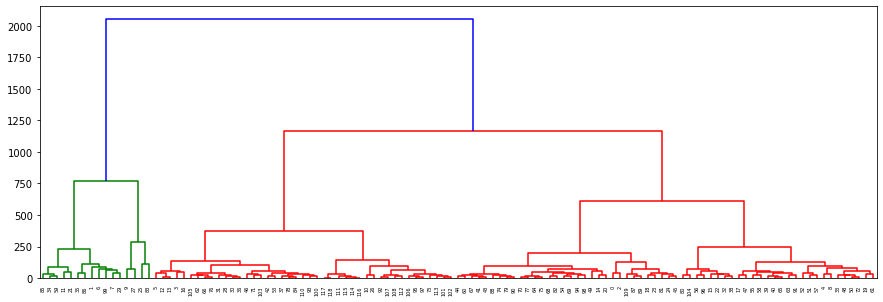

In [43]:
Z=linkage(X,'ward')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

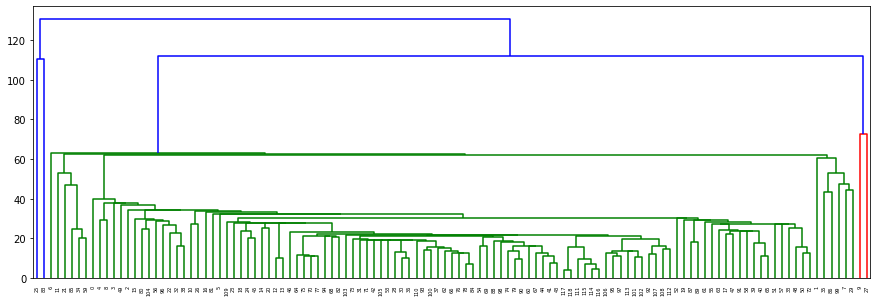

In [44]:
Z=linkage(X,'single')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

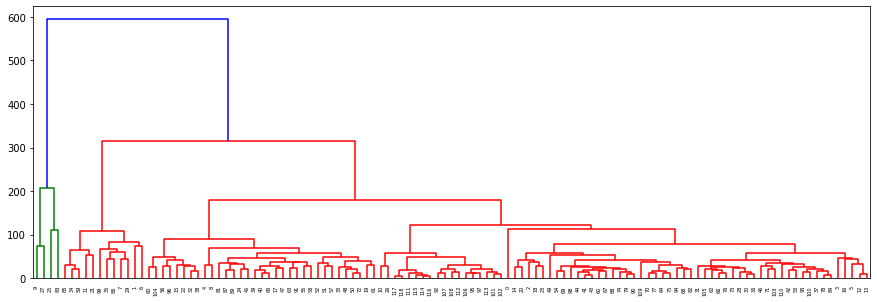

In [45]:
Z=linkage(X,'average')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

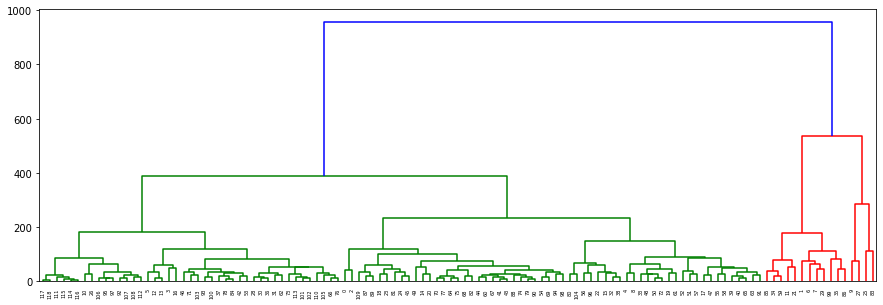

In [46]:
Z=linkage(X,'complete')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

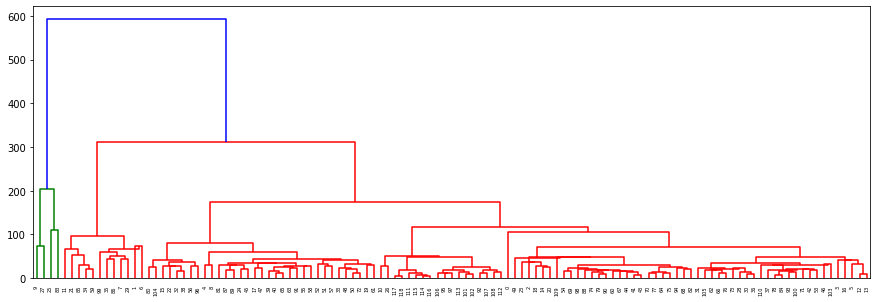

In [47]:
Z=linkage(X,'centroid')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                               linkage='ward')
cluster.fit_predict(X_sca)

array([4, 1, 1, 4, 4, 4, 2, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1,
       0, 0, 4, 2, 4, 2, 4, 0, 1, 1, 2, 4, 2, 2, 4, 0, 0, 1, 0, 4, 0, 4,
       4, 0, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 4, 1,
       1, 0, 1, 1, 0, 0, 0, 4, 4, 1, 1, 3, 1, 0, 0, 1, 4, 2, 2, 2, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 3, 4, 0, 0, 0, 4, 4, 4, 1, 1,
       1, 1, 4, 4, 4, 0, 4, 1, 4], dtype=int64)

In [49]:
y=cluster.fit_predict(X_sca)

In [50]:
hero_stats[['hero_id','localized_name']]

,hero_id,localized_name
0,95,Troll Warlord
1,21,Windranger
2,56,Clinkz
3,64,Jakiro
4,86,Rubick
...,...,...
114,119,Dark Willow
115,129,Mars
116,121,Grimstroke
117,126,Void Spirit


In [51]:
pd.Series(y+1)

0      5
1      2
2      2
3      5
4      5
      ..
114    5
115    1
116    5
117    2
118    5
Length: 119, dtype: int64

In [52]:
my_hero_rating=pd.concat([hero_stats[['hero_id','localized_name']],pd.Series(y+1)],axis=1)
print(my_hero_rating.head())
my_hero_rating=my_hero_rating.rename(columns={0:'my_hero_rating'})
print(my_hero_rating.head())

   hero_id localized_name  0
0       95  Troll Warlord  5
1       21     Windranger  2
2       56         Clinkz  2
3       64         Jakiro  5
4       86         Rubick  5
   hero_id localized_name  my_hero_rating
0       95  Troll Warlord               5
1       21     Windranger               2
2       56         Clinkz               2
3       64         Jakiro               5
4       86         Rubick               5


In [53]:
my_hero_rating['my_hero_rating'].value_counts()

2    38
5    36
1    27
3    13
4     5
Name: my_hero_rating, dtype: int64

In [54]:
my_hero_rating[my_hero_rating['my_hero_rating']==1]

,hero_id,localized_name,my_hero_rating
22,41,Faceless Void,1
23,20,Vengeful Spirit,1
29,7,Earthshaker,1
37,83,Treant Protector,1
38,18,Sven,1
40,16,Sand King,1
42,37,Warlock,1
45,99,Bristleback,1
60,57,Omniknight,1
61,28,Slardar,1


In [55]:
for i in range(1,6):
    print(my_hero_rating[my_hero_rating['my_hero_rating']==i])
    print()

     hero_id     localized_name  my_hero_rating
22        41      Faceless Void               1
23        20    Vengeful Spirit               1
29         7        Earthshaker               1
37        83   Treant Protector               1
38        18               Sven               1
40        16          Sand King               1
42        37            Warlock               1
45        99        Bristleback               1
60        57         Omniknight               1
61        28            Slardar               1
67        29         Tidehunter               1
70        96  Centaur Warrunner               1
71        97             Magnus               1
72        47              Viper               1
79       100               Tusk               1
80         2                Axe               1
88        51          Clockwerk               1
90        69               Doom               1
91        59             Huskar               1
92        38        Beastmaster         

# MATCH DATA

Since there is no win/loss in the originial,partited in the api.opendota

In [56]:
# taking match data
# https://api.opendota.com/api/players/116926281/matches?win=1
# curl -o match_win.json https://api.opendota.com/api/players/116926281/matches?win=1

In [57]:
match_win=pd.read_json('./116926281_matches_win.json',orient='columns')
match_win.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size
0,5235070741,1,True,2048,4,0,54,2020-02-09 17:52:19,21.0,12,1,9,1.0,0,5.0
1,5229954942,3,True,1918,4,0,44,2020-02-06 19:18:11,21.0,9,0,7,1.0,0,4.0
2,5214153690,131,False,3896,22,0,17,2020-01-27 17:48:47,21.0,6,8,14,NaN,0,2.0
3,5212602277,3,True,3797,22,0,97,2020-01-26 16:56:55,21.0,2,10,23,NaN,0,2.0
4,5211100392,132,False,2395,4,0,103,2020-01-25 17:02:01,21.0,5,3,19,1.0,0,3.0


In [58]:
match_win['win']=1
match_win.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win
0,5235070741,1,True,2048,4,0,54,2020-02-09 17:52:19,21.0,12,1,9,1.0,0,5.0,1
1,5229954942,3,True,1918,4,0,44,2020-02-06 19:18:11,21.0,9,0,7,1.0,0,4.0,1
2,5214153690,131,False,3896,22,0,17,2020-01-27 17:48:47,21.0,6,8,14,NaN,0,2.0,1
3,5212602277,3,True,3797,22,0,97,2020-01-26 16:56:55,21.0,2,10,23,NaN,0,2.0,1
4,5211100392,132,False,2395,4,0,103,2020-01-25 17:02:01,21.0,5,3,19,1.0,0,3.0,1


In [59]:
# taking match loss data
# https://api.opendota.com/api/players/116926281/matches?win=0
# curl -o match_loss.json https://api.opendota.com/api/players/116926281/matches?win=0

In [60]:
match_loss=pd.read_json('./116926281_matches_loss.json',orient='columns')
match_loss.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size
0,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0
1,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0
2,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0
3,5220252399,130,True,2274,5,0,72,2020-01-31 19:13:50,21.0,11,4,19,1.0,0,5.0
4,5220163627,130,True,2348,4,0,110,2020-01-31 17:57:40,21.0,3,8,16,1.0,0,5.0


In [61]:
match_loss['win']=0
match_loss.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win
0,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0,0
1,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0,0
2,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0,0
3,5220252399,130,True,2274,5,0,72,2020-01-31 19:13:50,21.0,11,4,19,1.0,0,5.0,0
4,5220163627,130,True,2348,4,0,110,2020-01-31 17:57:40,21.0,3,8,16,1.0,0,5.0,0


In [62]:
matches=pd.concat([match_win,match_loss],axis=0,ignore_index=True)
matches = matches.sort_values(by=['match_id'],ascending=[False])
matches.head(10)

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win
1950,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0,0
0,5235070741,1,True,2048,4,0,54,2020-02-09 17:52:19,21.0,12,1,9,1.0,0,5.0,1
1,5229954942,3,True,1918,4,0,44,2020-02-06 19:18:11,21.0,9,0,7,1.0,0,4.0,1
1951,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0,0
1952,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0,0
1953,5220252399,130,True,2274,5,0,72,2020-01-31 19:13:50,21.0,11,4,19,1.0,0,5.0,0
1954,5220163627,130,True,2348,4,0,110,2020-01-31 17:57:40,21.0,3,8,16,1.0,0,5.0,0
2,5214153690,131,False,3896,22,0,17,2020-01-27 17:48:47,21.0,6,8,14,NaN,0,2.0,1
1955,5214090285,0,False,2491,22,0,67,2020-01-27 16:57:46,21.0,12,11,10,1.0,0,2.0,0
3,5212602277,3,True,3797,22,0,97,2020-01-26 16:56:55,21.0,2,10,23,NaN,0,2.0,1


## Creating a new columns called Side
**Either Playing as Radiant or Dire**

In [63]:
matches[(matches['radiant_win']==True)&(matches['win']==1)].index

Int64Index([   0,    1,    3,    5,    7,    9,   10,   15,   19,   21,
            ...
            1932, 1933, 1934, 1935, 1937, 1939, 1940, 1941, 1946, 1949],
           dtype='int64', length=1002)

In [64]:
matches.loc[matches[(matches['radiant_win']==True)&(matches['win']==1)].index,'side']='Radiant'

In [65]:
matches[(matches['radiant_win']==True)&(matches['win']==0)]

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
1950,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0,0,NaN
1951,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0,0,NaN
1952,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0,0,NaN
1953,5220252399,130,True,2274,5,0,72,2020-01-31 19:13:50,21.0,11,4,19,1.0,0,5.0,0,NaN
1954,5220163627,130,True,2348,4,0,110,2020-01-31 17:57:40,21.0,3,8,16,1.0,0,5.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,127857003,131,True,1956,1,0,21,2013-02-17 06:46:44,NaN,1,15,5,NaN,0,NaN,0,NaN
3928,126373211,131,True,1355,1,0,95,2013-02-15 18:47:40,NaN,3,14,2,NaN,0,NaN,0,NaN
3930,126123853,128,True,2166,1,0,4,2013-02-15 14:47:02,NaN,2,17,6,NaN,0,NaN,0,NaN
3933,124326020,128,True,2321,4,0,56,2013-02-13 13:06:16,NaN,6,13,5,NaN,0,NaN,0,NaN


In [66]:
matches.loc[matches[(matches['radiant_win']==True)&(matches['win']==0)].index,'side']='Dire'

In [67]:
matches[(matches['radiant_win']==False)&(matches['win']==1)]

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
2,5214153690,131,False,3896,22,0,17,2020-01-27 17:48:47,21.0,6,8,14,NaN,0,2.0,1,NaN
4,5211100392,132,False,2395,4,0,103,2020-01-25 17:02:01,21.0,5,3,19,1.0,0,3.0,1,NaN
6,5194668456,129,False,2857,3,0,21,2020-01-12 18:49:07,21.0,2,8,34,NaN,0,5.0,1,NaN
8,5191706272,128,False,2616,4,0,14,2020-01-10 18:49:08,21.0,5,7,26,1.0,0,5.0,1,NaN
11,5180495926,131,False,2875,4,0,3,2020-01-02 15:37:32,NaN,7,10,14,1.0,0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,130064470,132,False,2491,1,0,95,2013-02-19 15:51:34,NaN,9,12,18,NaN,0,NaN,1,NaN
1944,129259003,131,False,2032,1,0,56,2013-02-18 16:27:06,NaN,4,7,4,NaN,0,NaN,1,NaN
1945,127259538,131,False,2088,1,0,95,2013-02-16 16:00:05,NaN,4,9,16,NaN,0,NaN,1,NaN
1947,126299015,132,False,2988,1,0,95,2013-02-15 17:34:10,NaN,4,9,21,NaN,0,NaN,1,NaN


In [68]:
matches.loc[matches[(matches['radiant_win']==False)&(matches['win']==1)].index,'side']='Dire'

In [69]:
matches[(matches['radiant_win']==False)&(matches['win']==0)]

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
1955,5214090285,0,False,2491,22,0,67,2020-01-27 16:57:46,21.0,12,11,10,1.0,0,2.0,0,NaN
1957,5199530123,3,False,1333,4,0,73,2020-01-16 19:10:41,21.0,0,8,0,1.0,0,3.0,0,NaN
1961,5191647975,3,False,2544,3,0,68,2020-01-10 17:52:41,21.0,7,10,12,1.0,0,5.0,0,NaN
1962,5184554751,0,False,2124,3,0,9,2020-01-05 11:02:27,NaN,1,7,5,NaN,0,NaN,0,NaN
1963,5184412314,1,False,1851,4,0,33,2020-01-05 09:05:21,21.0,2,6,13,1.0,0,5.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,126831387,2,False,2743,1,0,56,2013-02-16 08:21:06,NaN,5,11,11,NaN,0,NaN,0,NaN
3927,126730217,3,False,1839,1,0,41,2013-02-16 05:17:09,NaN,1,14,5,NaN,0,NaN,0,NaN
3929,126223882,4,False,1448,1,0,95,2013-02-15 16:22:30,NaN,3,6,5,NaN,1,NaN,0,NaN
3931,126068691,3,False,2092,1,0,4,2013-02-15 13:53:01,NaN,2,12,9,NaN,0,NaN,0,NaN


In [70]:
matches.loc[matches[(matches['radiant_win']==False)&(matches['win']==0)].index,'side']='Radiant'

In [71]:
matches.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
1950,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0,0,Dire
0,5235070741,1,True,2048,4,0,54,2020-02-09 17:52:19,21.0,12,1,9,1.0,0,5.0,1,Radiant
1,5229954942,3,True,1918,4,0,44,2020-02-06 19:18:11,21.0,9,0,7,1.0,0,4.0,1,Radiant
1951,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0,0,Dire
1952,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0,0,Dire


In [72]:
matches.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'leaver_status', 'party_size', 'win', 'side'],
      dtype='object')

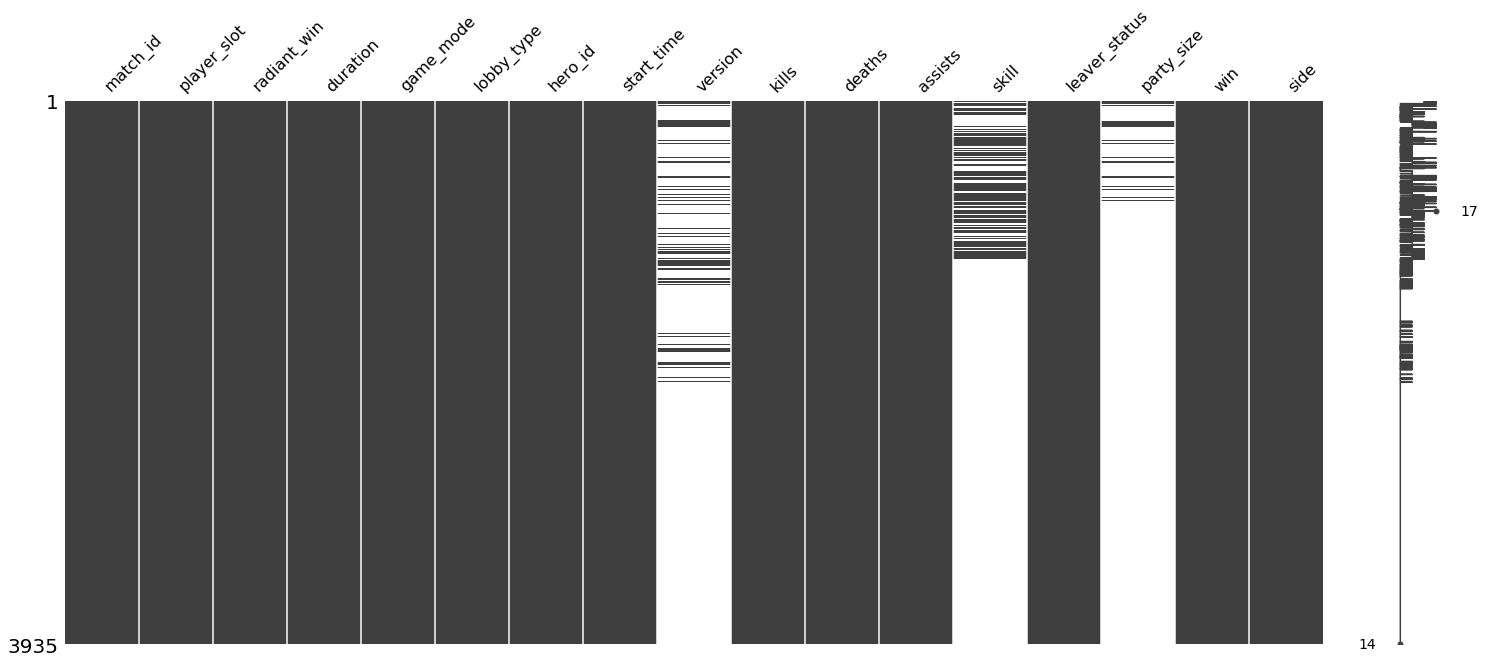

In [73]:
missingno.matrix(matches)

In [74]:
matches['start_time'].dt.year

1950    2020
0       2020
1       2020
1951    2020
1952    2020
        ... 
3932    2013
3933    2013
1948    2013
1949    2013
3934    2013
Name: start_time, Length: 3935, dtype: int64

## Adding Hero Rating to the model

In [75]:
matches=pd.merge(matches,my_hero_rating,on='hero_id').sort_values(by=['match_id'],ascending=[False])
matches.head(10)

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side,localized_name,my_hero_rating
0,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0,0,Dire,Phantom Lancer,2
31,5235070741,1,True,2048,4,0,54,2020-02-09 17:52:19,21.0,12,1,9,1.0,0,5.0,1,Radiant,Lifestealer,2
65,5229954942,3,True,1918,4,0,44,2020-02-06 19:18:11,21.0,9,0,7,1.0,0,4.0,1,Radiant,Phantom Assassin,3
105,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0,0,Dire,Rubick,5
179,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0,0,Dire,Oracle,5
191,5220252399,130,True,2274,5,0,72,2020-01-31 19:13:50,21.0,11,4,19,1.0,0,5.0,0,Dire,Gyrocopter,5
216,5220163627,130,True,2348,4,0,110,2020-01-31 17:57:40,21.0,3,8,16,1.0,0,5.0,0,Dire,Phoenix,5
230,5214153690,131,False,3896,22,0,17,2020-01-27 17:48:47,21.0,6,8,14,NaN,0,2.0,1,Dire,Storm Spirit,2
267,5214090285,0,False,2491,22,0,67,2020-01-27 16:57:46,21.0,12,11,10,1.0,0,2.0,0,Radiant,Spectre,2
296,5212602277,3,True,3797,22,0,97,2020-01-26 16:56:55,21.0,2,10,23,NaN,0,2.0,1,Radiant,Magnus,1


In [76]:
matches.describe()

,match_id,player_slot,duration,game_mode,lobby_type,hero_id,version,kills,deaths,assists,skill,leaver_status,party_size,win,my_hero_rating
count,3.933000e+03,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,390.000000,3933.000000,3933.000000,3933.000000,781.000000,3933.000000,116.000000,3933.000000,3933.000000
mean,1.976798e+09,66.693364,2580.450292,9.738876,3.369692,54.047038,18.384615,5.578693,6.878973,12.754894,1.002561,0.084668,2.448276,0.495805,3.121790
std,1.471672e+09,64.059874,651.033480,9.835302,3.498672,31.252403,2.426454,4.161689,3.522071,7.005443,0.071566,0.368110,1.716137,0.500046,1.578617
min,1.216286e+08,0.000000,369.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,5.930533e+08,2.000000,2157.000000,1.000000,0.000000,26.000000,17.000000,3.000000,4.000000,8.000000,1.000000,0.000000,1.000000,0.000000,2.000000
50%,1.754347e+09,128.000000,2525.000000,4.000000,0.000000,54.000000,18.000000,5.000000,7.000000,12.000000,1.000000,0.000000,1.000000,0.000000,3.000000
75%,3.230124e+09,130.000000,2978.000000,22.000000,7.000000,82.000000,21.000000,8.000000,9.000000,17.000000,1.000000,0.000000,4.000000,1.000000,5.000000
max,5.236694e+09,132.000000,6170.000000,22.000000,9.000000,129.000000,21.000000,32.000000,20.000000,48.000000,3.000000,4.000000,5.000000,1.000000,5.000000


In [77]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 1850
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   match_id        3933 non-null   int64         
 1   player_slot     3933 non-null   int64         
 2   radiant_win     3933 non-null   bool          
 3   duration        3933 non-null   int64         
 4   game_mode       3933 non-null   int64         
 5   lobby_type      3933 non-null   int64         
 6   hero_id         3933 non-null   int64         
 7   start_time      3933 non-null   datetime64[ns]
 8   version         390 non-null    float64       
 9   kills           3933 non-null   int64         
 10  deaths          3933 non-null   int64         
 11  assists         3933 non-null   int64         
 12  skill           781 non-null    float64       
 13  leaver_status   3933 non-null   int64         
 14  party_size      116 non-null    float64       
 15  win 

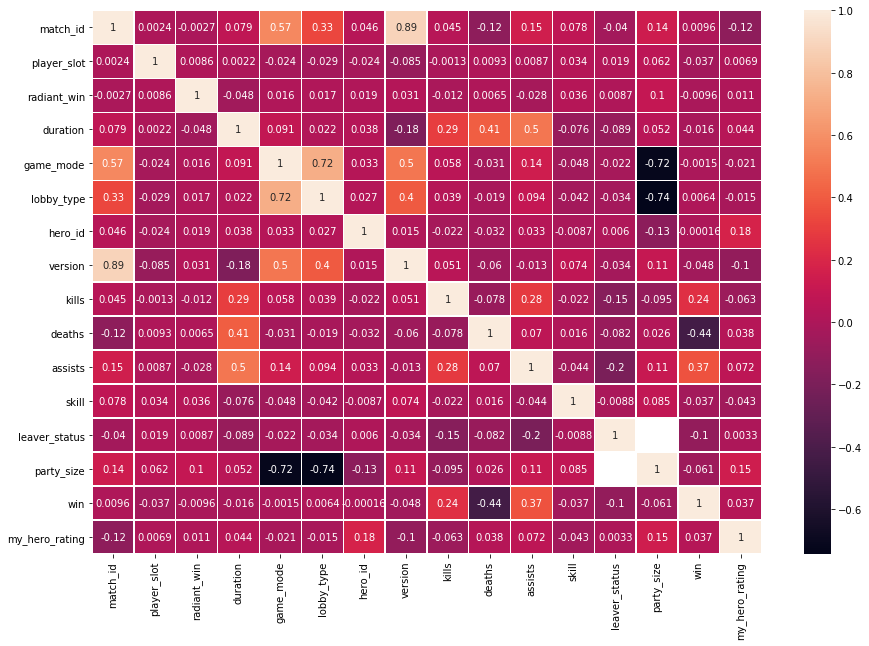

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(matches.corr(),annot=True,linewidths=0.3)
plt.show()

In [79]:
matches

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side,localized_name,my_hero_rating
0,5236693552,130,True,2643,4,0,12,2020-02-10 18:35:06,21.0,2,7,6,1.0,0,5.0,0,Dire,Phantom Lancer,2
31,5235070741,1,True,2048,4,0,54,2020-02-09 17:52:19,21.0,12,1,9,1.0,0,5.0,1,Radiant,Lifestealer,2
65,5229954942,3,True,1918,4,0,44,2020-02-06 19:18:11,21.0,9,0,7,1.0,0,4.0,1,Radiant,Phantom Assassin,3
105,5228426355,129,True,2410,4,0,86,2020-02-05 19:52:56,21.0,2,7,9,1.0,0,5.0,0,Dire,Rubick,5
179,5228366584,129,True,2851,3,0,111,2020-02-05 18:54:24,21.0,3,9,11,NaN,0,5.0,0,Dire,Oracle,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,124375132,3,False,2043,1,0,95,2013-02-13 14:04:19,NaN,3,16,5,NaN,0,NaN,0,Radiant,Troll Warlord,5
3694,124326020,128,True,2321,4,0,56,2013-02-13 13:06:16,NaN,6,13,5,NaN,0,NaN,0,Dire,Clinkz,2
1848,123590679,130,False,2285,1,0,95,2013-02-12 14:52:17,NaN,4,7,15,NaN,0,NaN,1,Dire,Troll Warlord,5
1849,121783968,4,True,2579,1,0,95,2013-02-10 13:12:07,NaN,2,12,13,NaN,0,NaN,1,Radiant,Troll Warlord,5


In [80]:
df=matches.drop(['match_id','player_slot','radiant_win','lobby_type','start_time','version','skill','leaver_status','party_size','localized_name'],axis=1)

In [81]:
df

,duration,game_mode,hero_id,kills,deaths,assists,win,side,my_hero_rating
0,2643,4,12,2,7,6,0,Dire,2
31,2048,4,54,12,1,9,1,Radiant,2
65,1918,4,44,9,0,7,1,Radiant,3
105,2410,4,86,2,7,9,0,Dire,5
179,2851,3,111,3,9,11,0,Dire,5
...,...,...,...,...,...,...,...,...,...
1847,2043,1,95,3,16,5,0,Radiant,5
3694,2321,4,56,6,13,5,0,Dire,2
1848,2285,1,95,4,7,15,1,Dire,5
1849,2579,1,95,2,12,13,1,Radiant,5


In [82]:
print(df['win'].value_counts())
print(df['win'].value_counts(normalize=True))

0    1983
1    1950
Name: win, dtype: int64
0    0.504195
1    0.495805
Name: win, dtype: float64


In [83]:
df=pd.get_dummies(df, prefix=['side'])
df.head()

,duration,game_mode,hero_id,kills,deaths,assists,win,my_hero_rating,side_Dire,side_Radiant
0,2643,4,12,2,7,6,0,2,1,0
31,2048,4,54,12,1,9,1,2,0,1
65,1918,4,44,9,0,7,1,3,0,1
105,2410,4,86,2,7,9,0,5,1,0
179,2851,3,111,3,9,11,0,5,1,0


In [84]:
df['hero_id'].max()

129

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [86]:
df['hero_id']=le.fit_transform(df['hero_id'])

In [87]:
y=df['win']
X=df.drop(['win'],axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [89]:
X_sca=sc.fit_transform(X)

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sca,y,test_size=0.33,random_state=0)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [92]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4),
    DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4),
    RandomForestClassifier(n_estimators=100,max_depth=4),
    KNeighborsClassifier(n_neighbors=10),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [93]:

results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

[[521 138]
 [143 496]]
accuracy train: 0.7901328273244782 

accuracy test: 0.7835130970724191 

precision : 0.7823343848580442 

Recall score: 0.7762128325508607 

f1 score: 0.7792615868028279 

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       659
           1       0.78      0.78      0.78       639

    accuracy                           0.78      1298
   macro avg       0.78      0.78      0.78      1298
weighted avg       0.78      0.78      0.78      1298

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_we